In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
import warnings #avoid warning flash
warnings.filterwarnings('ignore')


In [7]:
df=pd.read_csv("/content/diabetes.csv")

In [8]:
df.head() #get familier with dataset, display the top 5 data records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.info() #Print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
df.describe() #helps us to understand how data has been spread across the table.
# count :- the number of NoN-empty rows in a feature.
# mean :- mean value of that feature.
# std :- Standard Deviation Value of that feature.
# min :- minimum value of that feature.
# max :- maximum value of that feature.
# 25%, 50%, and 75% are the percentile/quartile of each features. 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


CONCLUSION :- We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

b. Data Cleaning

Dropping duplicate values

Checking NULL values

Checking for 0 value and replacing it :- It isn't medically possible for some data record to have 0 value such as Blood Pressure or Glucose levels. Hence we replace them with the mean value of that particular column.

In [17]:
#dropping duplicate values - checking if there are any duplicate rows and dropping if any
df=df.drop_duplicates()
#check for missing values, count them and print the sum for every column
df.isnull().sum() #conclusion :- there are no null values in this dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
#checking for 0 values in 5 columns , Age & DiabetesPedigreeFunction do not have have minimum 0 value so no need to replace , also no. of pregnancies as 0 is possible as observed in df.describe
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [19]:
#replacing 0 values with median of that column
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())#normal distribution
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())#normal distribution
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())#skewed distribution
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())#skewed distribution
df['BMI']=df['BMI'].replace(0,df['BMI'].median())#skewed distribution

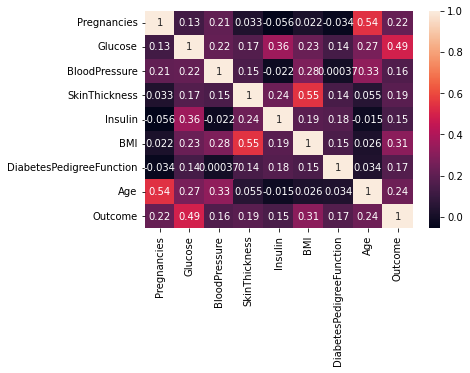

In [20]:
corrmat=df.corr()
sns.heatmap(corrmat, annot=True)

CONCLUSION :- Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them

In [21]:
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [23]:
target_name='Outcome'
y= df[target_name]#given predictions - training data 
X=df.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [25]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [26]:
X_test.shape,y_test.shape

((154, 8), (154,))

In [35]:
X.head() # contains only independent features 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [28]:
reg = LogisticRegression()
reg.fit(X_train,y_train) 

LogisticRegression()

In [29]:
lr_pred=reg.predict(X_test)

In [30]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       107
           1       0.68      0.60      0.64        47

    accuracy                           0.79       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.79      0.79      0.79       154


 F1:
 0.6363636363636364

 Precision score is:
 0.6829268292682927

 Recall score is:
 0.5957446808510638

 Confusion Matrix:



In [33]:
import pickle
# create an iterator object with write permission - model.pkl
with open('diabetes_model_pkl', 'wb') as files:
    pickle.dump(reg, files)